<h1>Random Forest with the iris dataset</h1>

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

<h2>Look at directory with the iris dataset</h2>

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

<h2>Grabs the data off the iris dataframe</h2>

In [4]:
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<h2>Finds the target value of the iris dataset</h2>

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<h2>Initializes the dataframe "target" value</h2>

In [11]:
df["target"] = iris.target
df = df.drop("targer", axis="columns")
df[0:15]

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


<h2>Now we set up our values (x holds the data values of the iris while y holds the target values)</h2>

In [12]:
X = df.drop("target", axis="columns")
Y = df.target

<h2>Use the train test split model for our data</h2>

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

<h2>Calculate the lengths of the x train and x test to make sure our data is correct</h2>

In [15]:
len(X_train)

112

In [16]:
len(X_test)

38

<h2>Implementing the Random Forest ensemble and finding our score</h2>

In [17]:
from sklearn.ensemble import RandomForestClassifier
iris_model = RandomForestClassifier(n_estimators = 10)
iris_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [19]:
iris_model.score(X_test, y_test)

0.9210526315789473

<h2>Finds the prediction of the y-value via the x values</h2>

In [20]:
y_predict = iris_model.predict(X_test)
y_predict

array([1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1,
       1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 2])

<h2>Confusion Matrix of our given iris dataset</h2>

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 8,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 14]], dtype=int64)

<h2>Plotting the values of our confusion matrix on a heatmap</h2>

Text(95.72222222222221, 0.5, 'Truth')

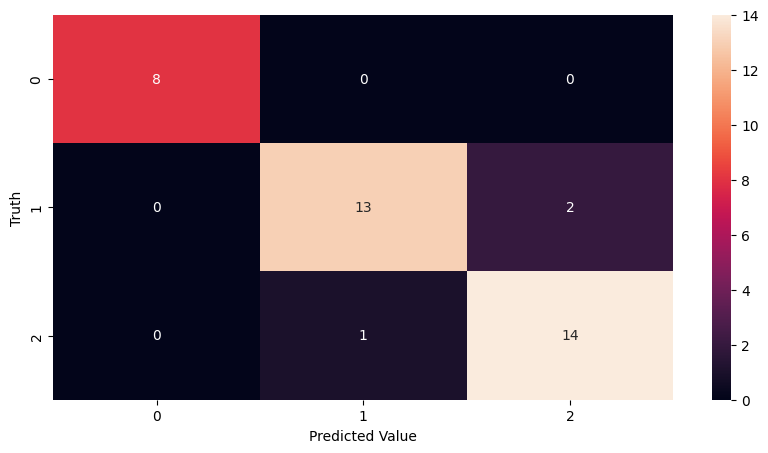

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10, 5))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Truth")